# Recognizing smiley faces using a logistic regression model

##### Topic discussed on Feb 8, 2023

##### Coded by: Prof. Louie F. Cervantes
#####           WVSU College of ICT

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
%matplotlib inline

In [5]:
# Load the data from a local file
elements = pd.read_csv(r"C:\Users\neanv\Downloads\elements.csv", header=None)
data = elements.iloc[:, :-1].values
target = elements.iloc[:, 64].values

print("Image Data Shape", data.shape)
print("Label Data Shape", target.shape)


Image Data Shape (40, 64)
Label Data Shape (40,)


In [7]:
elements = pd.read_csv(r"C:\Users\neanv\Downloads\elements.csv", header=None)
data = elements.iloc[:, :-1].values
target = elements.iloc[:,64].values

print("Image Data Shape", data.shape)
print("Label Data Shape", target.shape)

Image Data Shape (40, 64)
Label Data Shape (40,)


In [8]:
print("Data row 0:")
print(data[0].reshape(8,8))

print("Data row 1:")
print(data[1].reshape(8,8))

print("target:", target)

Data row 0:
[[0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 1 1 1 1 1 1 0]]
Data row 1:
[[0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 1 1 0 0 0]
 [0 0 1 1 1 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0]]
target: [3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2]


first row of data:  [[0 0 0 1 0 0 0 0]
 [0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 0]
 [0 0 0 1 0 0 0 0]]
first row of label: 1
(8, 64)
(8,)


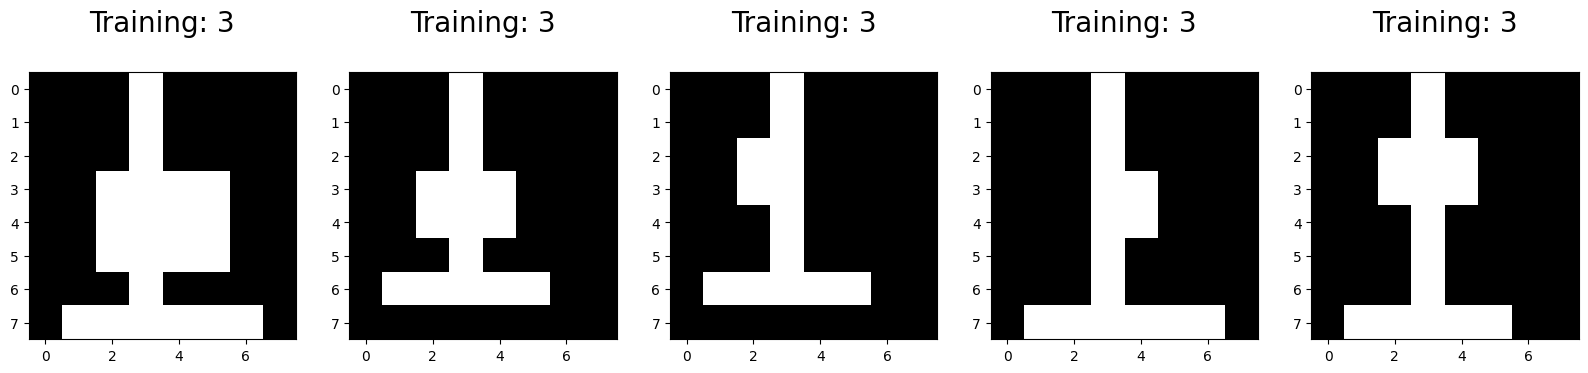

In [9]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(data[0:5], target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

x_train, x_test, y_train, y_test = train_test_split(data, target,
    test_size=0.2, random_state=100)

print('first row of data: ', x_train[0].reshape(8,8))
print('first row of label:', y_train[0])
print(x_test.shape)
print(y_test.shape)

In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression()
logres.fit(x_train, y_train)

#Configurations
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100, multi_class='ovr',
                   n_jobs=1, penalty='12', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12',
                   solver='liblinear')

In [11]:
print(logres.predict(x_test[0].reshape(1, -1)))

#predicting the output of the first 10 elements of the test set
result = logres.predict(x_test[0:10])
print('x_test: ', result)

#show the first 10 elements of the target set
print('y_test: ', y_test[0:10])

#predicting the labels of the test data
predictions = logres.predict(x_test)

#Determine the accuracy of the model
score = logres.score(x_test, y_test)

print('score: ', score)

[0]
x_test:  [0 3 1 3 2 1 2 1]
y_test:  [0 3 1 3 2 1 2 1]
score:  1.0


##### The confusion matrix in a heat map

In [12]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [0 0 0 2]]


##### The confusion matrix in a visual form

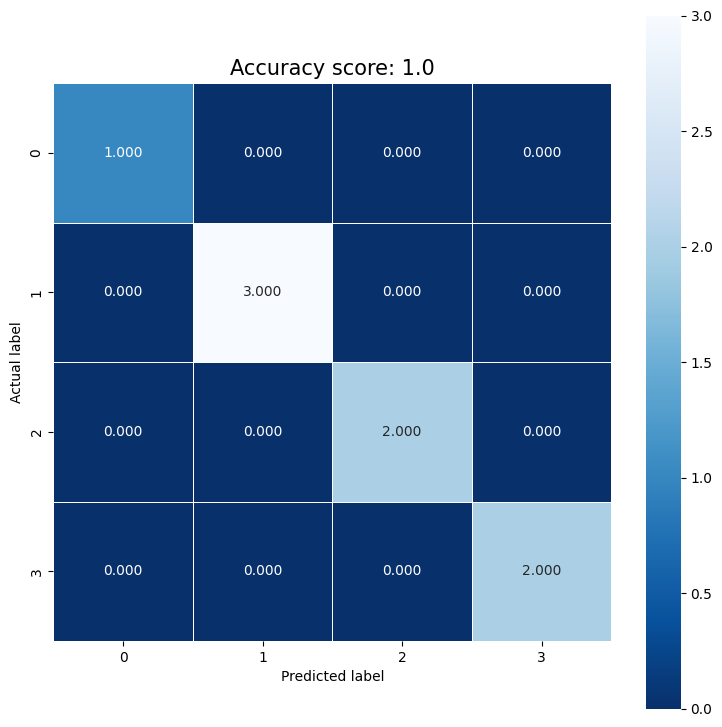

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title= 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size=15);

Nean Ordinario
02/18/2024


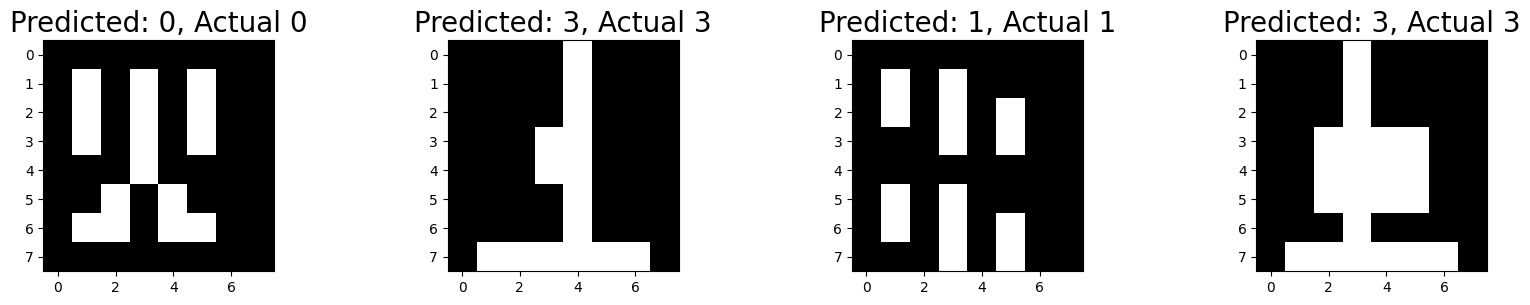

In [14]:
index = 0;
misclassifiedIndex = []

for predict, actual in zip(predictions, y_test):
    if predict==actual:
        misclassifiedIndex.append(index)
        index+=1

print("Nean Ordinario")
print("02/18/2024")

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual {}".format(predictions[wrong], y_test[wrong]), fontsize=20)

##### This logistic regression classifier can be improved by adding more test data and testing the model with new 8x8-pixel images.